#### DeeepLearning Frame 

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [15]:
import numpy as np 
import os 
import matplotlib.pyplot as plt
import tensorflow as tf 

In [8]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [17]:

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255


In [18]:
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [19]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)




Epoch 1: val_loss improved from inf to 0.14919, saving model to ./model\01-0.1492.hdf5

Epoch 2: val_loss improved from 0.14919 to 0.10328, saving model to ./model\02-0.1033.hdf5

Epoch 3: val_loss improved from 0.10328 to 0.09059, saving model to ./model\03-0.0906.hdf5

Epoch 4: val_loss improved from 0.09059 to 0.07621, saving model to ./model\04-0.0762.hdf5

Epoch 5: val_loss improved from 0.07621 to 0.07487, saving model to ./model\05-0.0749.hdf5

Epoch 6: val_loss improved from 0.07487 to 0.06903, saving model to ./model\06-0.0690.hdf5

Epoch 7: val_loss improved from 0.06903 to 0.06641, saving model to ./model\07-0.0664.hdf5

Epoch 8: val_loss improved from 0.06641 to 0.06430, saving model to ./model\08-0.0643.hdf5

Epoch 9: val_loss improved from 0.06430 to 0.06428, saving model to ./model\09-0.0643.hdf5

Epoch 10: val_loss improved from 0.06428 to 0.06322, saving model to ./model\10-0.0632.hdf5

Epoch 11: val_loss improved from 0.06322 to 0.06309, saving model to ./model\11-0.

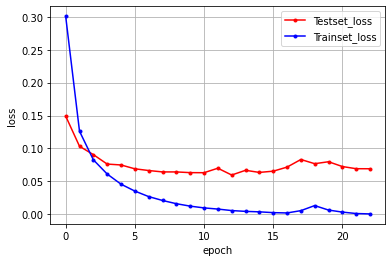

In [20]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

y_vloss = history.history['val_loss']

y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()